# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [120]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
import skimage.exposure as expose
# my name is mohammed 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [60]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is B4DA-B24E

 Directory of C:\Users\mohammed\assignments\image-assignments\assignment 1\Lab4

11/07/2020  04:46 PM    <DIR>          .
11/07/2020  04:46 PM    <DIR>          ..
11/07/2020  02:45 PM    <DIR>          .ipynb_checkpoints
11/07/2020  02:33 PM    <DIR>          .vscode
10/02/2019  11:03 AM         8,032,926 1.jpg
10/02/2019  11:05 AM            31,359 2.jpg
10/02/2019  11:03 AM             2,847 commonfunctions.py
10/30/2020  08:39 PM    <DIR>          imgs
10/02/2019  11:03 AM            31,232 ip_ContrastEnhancement.doc
10/02/2019  11:03 AM           395,787 Lab4_Contrast_Enhancement.pdf
11/07/2020  04:46 PM           337,098 Lab4_STD.ipynb
11/07/2020  02:36 PM                 0 __init__.py
11/07/2020  02:40 PM    <DIR>          __pycache__
               7 File(s)      8,831,249 bytes
               6 Dir(s)  328,514,969,600 bytes free


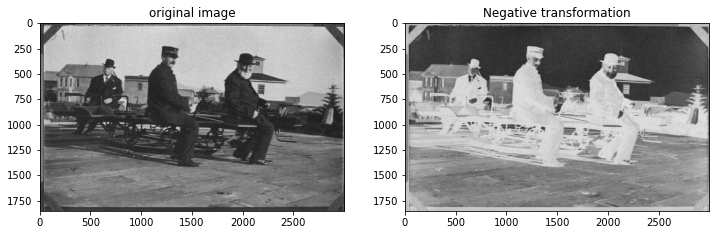

In [65]:
'''
1
Negative Transformation
eqn: T(r)=255-r
'''
def Negative(image, threshold):
    return 1 - image
img1 = io.imread('1.jpg',as_gray=True)
n_img1 = Negative(img1,1)
show_images([img1, n_img1], ["original image", "Negative transformation"])

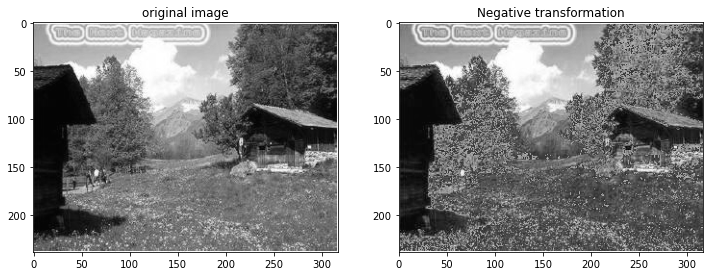

In [26]:
'''
2
Contrast Enhancement
'''
def contrast_enhancement(img):
    #return img
    img1 = img.copy()*255
    img1[img1<=(100)] = img1[img1<=(100)] * 1.5+(50)
    return img1/255
img2 = io.imread('2.jpg',as_gray=True)

n_img2 = contrast_enhancement(img2)
show_images([img2, n_img2], ["original image", "Negative transformation"])
showHist(img2*255)
showHist(n_img2*255)

In [119]:

# img2 = img1.copy()
# img2[img2<=(100/255)] = img1[img1<=(100/255)] * 1.5+50/255
# img2

In [22]:
'''
3
Gamma Correction
'''
"""
decreasing lambda just makes the image lighter
"""
def Gama_Correction(img,c=1,gama=.5):
    """
    ùê¥‚Ä≤ = ùëê ‚àó ùê¥ùõæ 
    """
    img2 = img.copy()
    img2 = c*(img2**gama)
    return img2

img2 = io.imread('1.jpg',as_gray=True)
# plt.imshow(img2)
img2_corrected_half = Gama_Correction(img2,1,.5)
img2_corrected_three = Gama_Correction(img2,1,3)
show_images([img2, img2_corrected_half,img2_corrected_three], ["original image", "corrected img gama=.5", "corrected img gama=3"])
# print(type(img2))

In [166]:

def hist_equalize_fast(img,G=256):
    """
    the function for histogram equalizatoin
    the image pixel value
    """
    N=img.shape[0]
    M=img.shape[1]
    img_cp=np.round(img.copy()*(G-1))
    H_C=expose.cumulative_distribution(img_cp,nbins=256)
    H_C=H_C[0]
    img_cp = img_cp.astype(int)
    return np.round((G-1) * H_C[img_cp.flatten()]).reshape((N,M))

    print("finished")
    return img_cp    

img1 = io.imread('1.jpg',as_gray=True)
img1_equal = hist_equalize_fast(img1)
show_images([img1, img1_equal], ["orginal image","equalized image"])
%timeit hist_equalize_fast(img1)

735 ms ¬± 14.8 ms per loop (mean ¬± std. dev. of 7 runs, 1 loop each)


finished


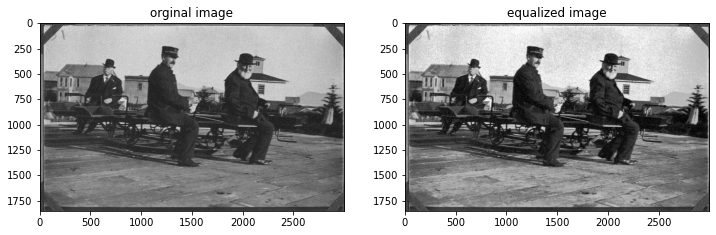

In [115]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass

def hist_equalize(img,G=256):
    """
    the function for histogram equalizatoin
    the image pixel value
    """
    N=img.shape[0]
    M=img.shape[1]
    img_cp=np.round(img.copy()*(G-1))
    pixel_counts={}
    for i in range(G):
        pixel_counts[i]=0
    for row in img_cp:
        for pixel in row:            
            pixel_counts[pixel]+=1            
    H_C={}
    for i in range(G):
        H_C[i] = 0
    for pixel in range(1,G):
        H_C[pixel] = H_C[pixel-1] + pixel_counts[pixel] 

#     now for each map each pixel using q = T[p] = round((G ‚Äì 1) * H_c[p] /(N * M))
    for row in range(N):
        for col in range(M):
            pixel=img_cp[row][col]
            img_cp[row][col] = round((G-1) * H_C[pixel]/(N*M))
    print("finished")
    return img_cp        


def hist_equalize_fast(img,G=256):
    N=img.shape[0]
    M=img.shape[1]
    img_cp=np.round(img.copy()*(G-1))
    imgHist = histogram(img_cp, nbins=G)
#     print(len(imgHist[0]))
    H_C = imgHist[0]
    for row in range(N):
        for col in range(M):
            pixel=round(img_cp[row][col])
            img_cp[row][col] = round((G-1) * H_C[int(pixel)]/(N*M))
    return img_cp
img1 = io.imread('1.jpg',as_gray=True)
img1_equal = hist_equalize(img1)
show_images([img1, img1_equal], ["orginal image","equalized image"])